In [5]:
%load_ext autoreload
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
%autoreload

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from keras.optimizers import RMSprop
from keras import backend as K
from keras.models import load_model
%matplotlib inline

import pickle

#
from vgg16_siamese import vgg16_siamese, contrastive_loss
import data_processing as data_p

IMG_DIR = "../../data/ssd-images/"

In [8]:
def accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    return K.mean(K.equal(y_true, K.cast(y_pred < 0.5, y_true.dtype)))

sVgg16 = load_model('./svgg16_model_0.h5', custom_objects={
    'contrastive_loss': contrastive_loss,
    'accuracy': accuracy
})

In [43]:
test_batches = pickle.load(open('./batches/split_test_batches.pkl', 'rb'))

# TODO: get rand pair from rand batch

# row = test_batches[0].iloc[2]

def predict_row(model, row):
    img_0 = data_p.id_to_jpg(row['id_0'], IMG_DIR)
    img_1 = data_p.id_to_jpg(row['id_1'], IMG_DIR)
    
    left, right = data_p.pair_augmentation(img_0, img_1)
    left = data_p.preprocess_input(np.array(left), mode='tf')
    right = data_p.preprocess_input(np.array(right), mode='tf')
    
    predictions = model.predict_on_batch([left, right])
#     print(predictions)
    return np.mean(predictions)


for i,row in test_batches[0].iterrows():
    dist = predict_row(sVgg16,row)
    print(dist, (dist < 0.5)== row['match'], row['id_0'], row['id_1'])

0.67682 True b6fd7f3a5b9fd84d59d37968d40d780386398bf1 eaa249fbd1a6ac827894529fe49b8c747d4e253c
0.14585368 False 32dad167f88b4b2a09ed24c9558e8be37219ecbf 9c273f849efbc5894f1a8c57813a1837c5eadb83
0.28280082 True b828aa56ccc0cac4844d5d59b9e316958d8ec6fe 6f36c15dd822cf39990214c543ab18ddd9ed7cfb
0.3156129 True ad69d403d4a107ffdf29edc6379d85ec9bb6176f dfd828c4cc4280b19adfe5bfa235abede18ea56a
0.073329516 True 65d3df47e60a712d96b5b7575a57d40ce22b1859 65b0addb683f462cf62c3a56717cff7025321bf6
0.23379414 True 819740abe32a6443dbb8ff357272ca56c75205df 0eafc44e3a10eb0de75fe8e5d6585de60973f89e
0.64233536 False 51a61a4d512979f39b516d77b029e894d8022f3d a240fb34775955c8c7cea29d5b4bf9745b77f5c2
0.2550682 True 89d8265c2a1858a83d2fbbc9222598308b97ca1b 980729fe4a73260f15430634f256c6c246e51948
0.27240327 True 151cadd456be3840ad8db83eb35a98d02051235e b47684d125295f75bb9b4970b7a3ffb23b2a9467
0.4176711 False 67396fe8d64ed10bdde268bd9380a647abecfbad 660fa350fca6dc13ddf704252c98fedf9231ff0f
0.6037865 True dedbb23

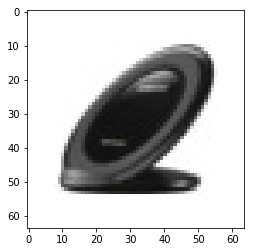

In [44]:
plt.imshow(data_p.id_to_jpg('51a61a4d512979f39b516d77b029e894d8022f3d', IMG_DIR) / 255)

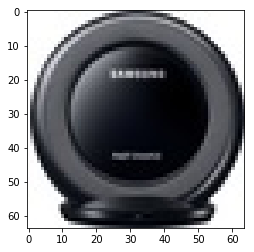

In [46]:
plt.imshow(data_p.id_to_jpg('a240fb34775955c8c7cea29d5b4bf9745b77f5c2', IMG_DIR) / 255)

In [55]:
def find_nearest(model, img_id, dataset):
    find_img = data_p.id_to_jpg(img_id, IMG_DIR)
    find_img = data_p.preprocess_input(np.array([find_img]), mode='tf')[0]
    find_img = np.array([find_img] * len(dataset))
        
    dataset_images = []
    for i,row in dataset.iterrows():
        dataset_images.append(row['id_1'])
        
    dataset_images = map(lambda x: data_p.id_to_jpg(x, IMG_DIR), dataset_images)
    dataset_images = data_p.preprocess_input(np.array(list(dataset_images)), mode='tf')
    
    dists = model.predict_on_batch([find_img, dataset_images])
    print(dists < 0.5, )

find_nearest(sVgg16, 'dedbb235cf7ba45d8731184752b12c245f8daecd', test_batches[0])

[[False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]]
